# Plot diagrams


In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
metric_file_path = "../runs/metrics.txt"
score_column = "f1_macro"

In [7]:
def get_wrapped_substring(whole_string, start_string, end_string):
    start = whole_string.index(start_string)
    end = whole_string.index(end_string)
    return whole_string[start + len(start_string) : end]


def number_to_string(value):
    if value == value:
        return str(int(value))
    else:  # NaN
        return "All"

In [3]:
metric_file = open(metric_file_path, "r")
content = metric_file.read().replace("\n", "").replace("}{", "},{")
entries = json.loads("[" + content + "]")
print(f"Read {len(entries)} entries")

Read 672 entries


In [32]:
df = pd.DataFrame.from_records(entries)
df["number_of_samples"] = df["number_of_samples"].apply(number_to_string)
print(df.columns)

aggregated_groups = df.groupby(
    ["model_name", "feature_identifier", "number_of_samples"]
).agg({"f1_macro": ["mean", "min", "max"]})
aggregated_groups.columns = aggregated_groups.columns.droplevel(0)
aggregated_groups = aggregated_groups.reset_index()
print(aggregated_groups.columns)

group = aggregated_groups.groupby(["model_name", "feature_identifier"])

Index(['model_name', 'feature_identifier', 'number_of_samples',
       'selection_seed', 'accuracy', 'balanced_accuracy', 'f1_weighted',
       'f1_micro', 'f1_macro'],
      dtype='object')
Index(['model_name', 'feature_identifier', 'number_of_samples', 'mean', 'min',
       'max'],
      dtype='object')


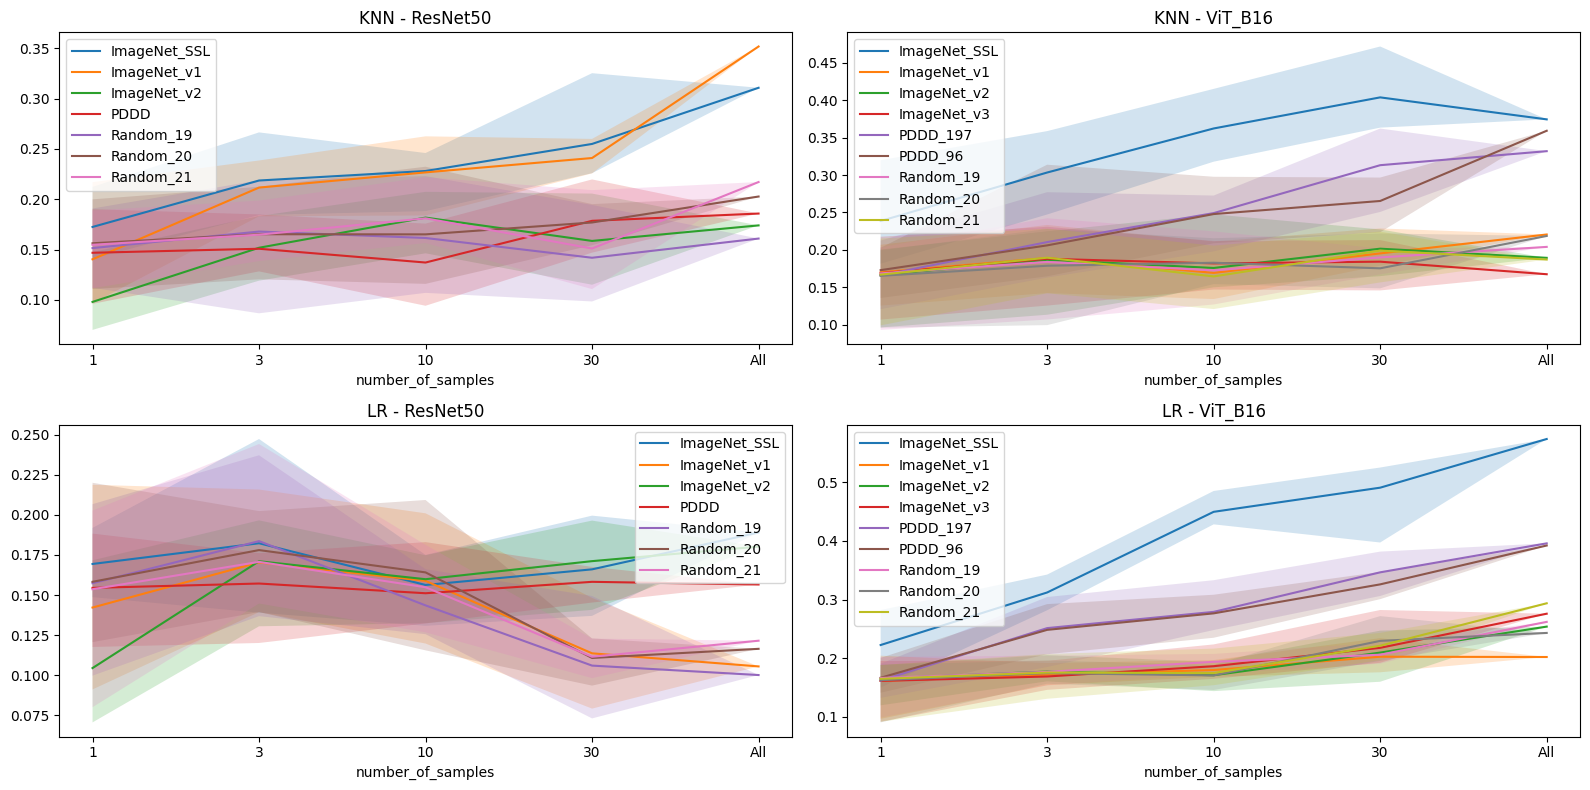

In [69]:
# TODO: group random
# TODO: group image_net SL

fig, ax = plt.subplots(2, 2, figsize=(16, 8))
ax[0][0].set_title(f"KNN - ResNet50")
ax[0][1].set_title(f"KNN - ViT_B16")
ax[1][0].set_title(f"LR - ResNet50")
ax[1][1].set_title(f"LR - ViT_B16")

row = None
column = None

for (model_name, feature_identifier), values in group:
    if "knn" == model_name:
        row = 0
    elif "lr" == model_name:
        row = 1
    else:
        print(f"Unknown model_name: {model_name}")
        continue

    if "Cassava_Mini-ResNet50" in feature_identifier:
        column = 0
        label = get_wrapped_substring(feature_identifier, "ResNet50-", ".csv")
    elif "Cassava_Mini-ViT_B16" in feature_identifier:
        column = 1
        label = get_wrapped_substring(feature_identifier, "ViT_B16-", ".csv")
    else:
        print(f"Unknown feature_identifier: {feature_identifier}")
        continue

    values.set_index("number_of_samples", inplace=True)
    values = values.reindex(index=["1", "3", "10", "30", "All"])
    ax[row][column].fill_between(
        values.index, values["min"], values["max"], alpha=0.2
    )  # ,label=[label]
    # ax[row][column].plot(values["mean"], linestyle='dashed',label=label) # ,label=[label]
    # continue
    values.plot.line(
        ax=ax[row][column],
        y=["mean"],
        # x=["number_of_samples"], NOTE: index is x-axis as default
        label=[label],
        # logy=logy
    )
    # ax[row][column].get_legend().remove()

# plt.title('Scatter plot', y=-0.01)
# ax[0].set_axis_off()
# ax[0].imshow(img, cmap="gray")

# ax[1].set_title(f"2")
# ax[1].plot([0,1,2,3],[0,1,2,3], color='g', label="green")
# ax[1].plot([0,1,2,3],[-1,0.5,2,3.5], color='b', label="blue")
# ax[1].plot([0,1,2,3],[-2,0,2,4], color='r', label="red")
# ax[1].set_axis_off()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=4)
fig.tight_layout()
plt.show()

# TODO: Y-Axis title
# TODO: X-Axis title

In [2]:
# ResNet Random_19 (K=1): 0.07036247334754797
# ResNet Random_20 (K=1): 0.053304904051172705
# ResNet Random_21 (K=1): 0.07462686567164178
# ResNet ImageNet_v1 (K=1): 0.15565031982942432
# ResNet ImageNet_v2 (K=1): 0.10660980810234541
# ResNet PDDD (K=1): 0.18976545842217485

# Swin_T Random_19 (K=1): 0.06823027718550106
# Swin_T Random_20 (K=1): 0.0767590618336887
# Swin_T Random_21 (K=1): 0.05543710021321962
# Swin_T ImageNet (K=1): 0.39872068230277186
# Swin_T PDDD (K=1): 0.2579957356076759

# ResNet Random_19: 0.0021321961620469083
# ResNet Random_20: 0.01279317697228145
# ResNet Random_21: 0.008528784648187633 ???
# ResNet ImageNet_v1: 0.008528784648187633 ???
# ResNet ImageNet_v2: 0.07889125799573561
# ResNet PDDD: 0.14285714285714285

# Swin_T Random_19: 0.1023454157782516
# Swin_T Random_20: 0.10660980810234541
# Swin_T Random_21: 0.12366737739872068
# Swin_T ImageNet: 0.5778251599147122
# Swin_T PDDD: 0.3411513859275053

x_values_random = [
    "KNN ResNet50",
    "KNN ResNet50",
    "KNN ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "KNN Swin-T",
    "KNN Swin-T",
    "LogReg Swin-T",
    "LogReg Swin-T",
    "LogReg Swin-T",
]
y_values_random = [
    0.07036247334754797,
    0.053304904051172705,
    0.07462686567164178,
    0.0021321961620469083,
    0.01279317697228145,
    0.008528784648187633,
    0.06823027718550106,
    0.0767590618336887,
    0.05543710021321962,
    0.1023454157782516,
    0.10660980810234541,
    0.12366737739872068,
]
x_values_imagenet = [
    "KNN ResNet50",
    "KNN ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "LogReg Swin-T",
]
y_values_imagenet = [
    0.15565031982942432,
    0.10660980810234541,
    0.008528784648187633,
    0.07889125799573561,
    0.39872068230277186,
    0.5778251599147122,
]
x_values_pddd = [
    "KNN ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "LogReg Swin-T",
]
y_values_pddd = [
    0.18976545842217485,
    0.14285714285714285,
    0.2579957356076759,
    0.3411513859275053,
]

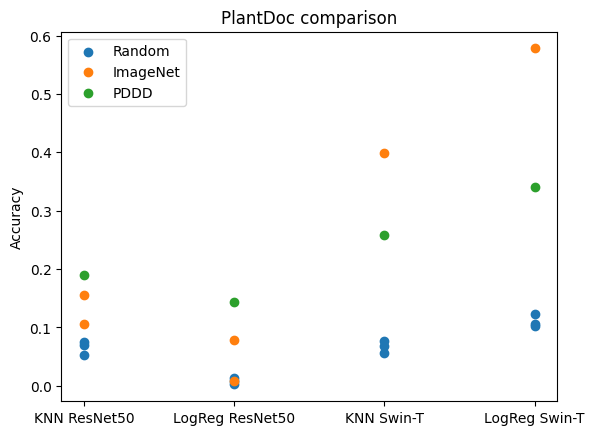

In [3]:
plt.scatter(x_values_random, y_values_random)
plt.scatter(x_values_imagenet, y_values_imagenet)
plt.scatter(x_values_pddd, y_values_pddd)
plt.gca().set_ylabel("Accuracy")  # gca = get current axes
plt.legend(["Random", "ImageNet", "PDDD"])
plt.title("PlantDoc comparison")
plt.show()

In [6]:
x_values_random = [
    "KNN ResNet50",
    "KNN ResNet50",
    "KNN ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "KNN Swin-T",
    "KNN Swin-T",
    "LogReg Swin-T",
    "LogReg Swin-T",
    "LogReg Swin-T",
]
y_values_random = [
    0.446064139941691,
    0.43440233236151604,
    0.43440233236151604,
    0.2944606413994169,
    0.32653061224489793,
    0.40233236151603496,
    0.45481049562682213,
    0.36151603498542273,
    0.40233236151603496,
    0.5451895043731778,
    0.4752186588921283,
    0.4956268221574344,
]
x_values_imagenet = [
    "KNN ResNet50",
    "KNN ResNet50",
    "LogReg ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "LogReg Swin-T",
]
y_values_imagenet = [
    0.5714285714285714,
    0.565597667638484,
    0.2565597667638484,
    0.4897959183673469,
    0.5830903790087464,
    0.7346938775510204,
]
x_values_pddd = [
    "KNN ResNet50",
    "LogReg ResNet50",
    "KNN Swin-T",
    "LogReg Swin-T",
]
y_values_pddd = [
    0.4752186588921283,
    0.42565597667638483,
    0.6122448979591837,
    0.6384839650145773,
]

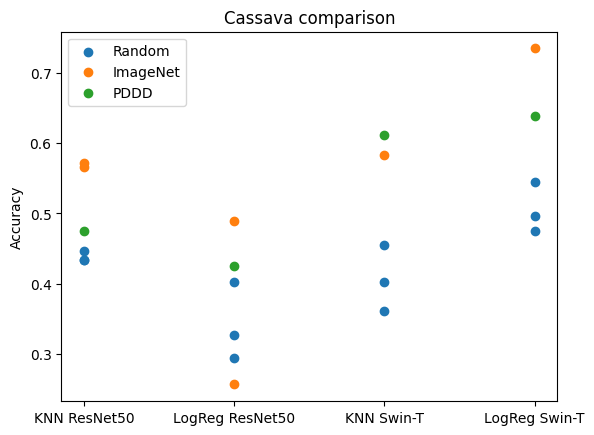

In [7]:
plt.scatter(x_values_random, y_values_random)
plt.scatter(x_values_imagenet, y_values_imagenet)
plt.scatter(x_values_pddd, y_values_pddd)
plt.gca().set_ylabel("Accuracy")  # gca = get current axes
plt.legend(["Random", "ImageNet", "PDDD"])
plt.title("Cassava comparison")
plt.show()